In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('house_price.csv')
print(df)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

<Axes: ylabel='price_per_sqft'>

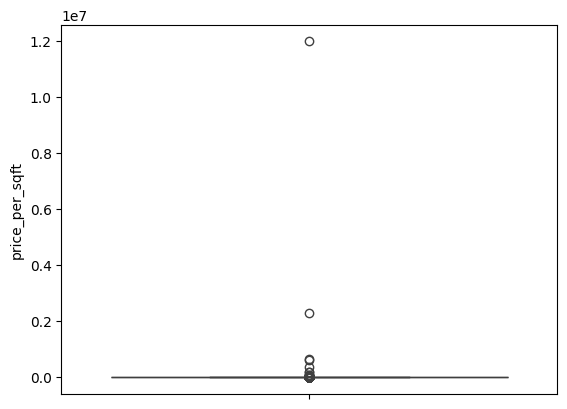

In [12]:
sns.boxplot(df['price_per_sqft'])

In [15]:
#to find datatypes
print(df.dtypes)

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object


In [23]:
#coverting price per sqft to float 
df['price_per_sqft'] = pd.to_numeric(df['price_per_sqft'],downcast = 'float', errors='coerce')
print(df.dtypes)

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft    float32
dtype: object


In [26]:
# to remove duplicates 
df.duplicated().sum()
removed_df = df.drop_duplicates()
print(removed_df)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13194         Green Glen Layout      3 BHK      1715.0   3.0  112.00    3   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   

       price_per_sqft  
0              3699.0  
1              4615.0  
2  

In [27]:
removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13198
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12151 non-null  object 
 1   size            12151 non-null  object 
 2   total_sqft      12151 non-null  float64
 3   bath            12151 non-null  float64
 4   price           12151 non-null  float64
 5   bhk             12151 non-null  int64  
 6   price_per_sqft  12151 non-null  float32
dtypes: float32(1), float64(3), int64(1), object(2)
memory usage: 712.0+ KB


## removing outliers

In [28]:
#mean function
print(removed_df['price_per_sqft'].mean())

8132.6416


### Percentile Method

In [29]:
#percentile method to remove outliers 
#For the percentile method, you can consider less than 5% and greater than 95%
upper_limit = removed_df['price_per_sqft'].quantile(0.95)
lower_limit = removed_df['price_per_sqft'].quantile(0.05)
print(upper_limit)
print(lower_limit)

15600.0
3150.0


In [31]:
#trimming method 
new_df = removed_df[(removed_df['price_per_sqft']<=upper_limit) & (removed_df['price_per_sqft']>=lower_limit)]
print(new_df)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13194         Green Glen Layout      3 BHK      1715.0   3.0  112.00    3   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   

       price_per_sqft  
0              3699.0  
1              4615.0  
2  

C:\Users\devik\AppData\Local\Temp\ipykernel_28364\3428773528.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

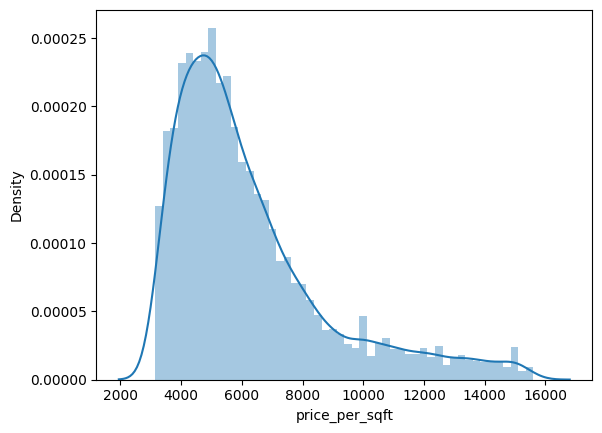

In [35]:
sns.distplot(new_df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

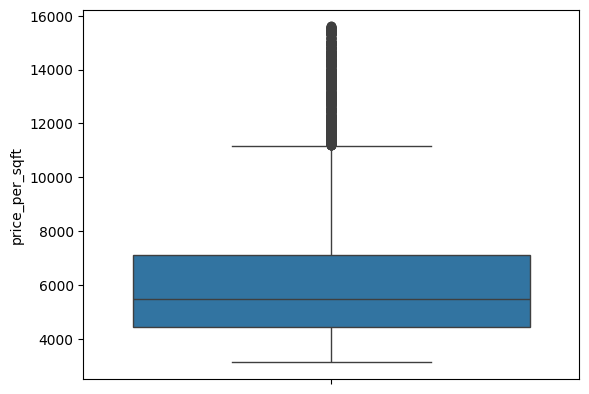

In [36]:
sns.boxplot(new_df['price_per_sqft'])

C:\Users\devik\AppData\Local\Temp\ipykernel_28364\2754349239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

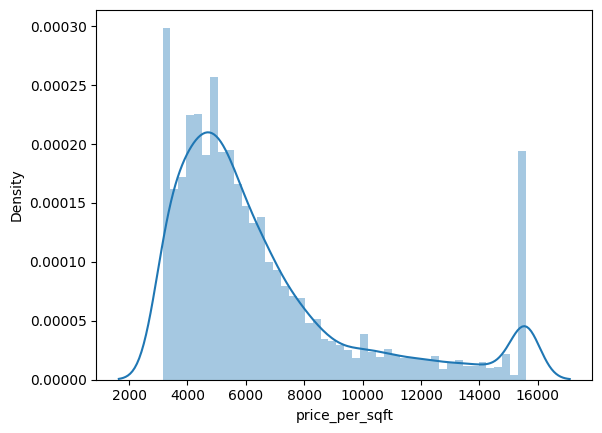

In [41]:
# capping method (Winsorization)
new_df = removed_df.copy()
new_df.loc[new_df['price_per_sqft'] >= upper_limit,'price_per_sqft'] = upper_limit
new_df.loc[new_df['price_per_sqft'] <= lower_limit,'price_per_sqft'] = lower_limit
sns.distplot(new_df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

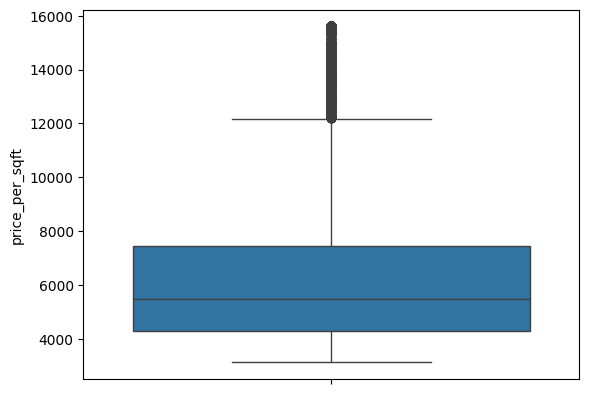

In [42]:
sns.boxplot(new_df['price_per_sqft'])

### InterQuartileMethod

In [45]:
df =pd.read_csv('house_price.csv')
q1 =df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
iqr = q3-q1
print (q1)
print(q3)
print (iqr)

4267.0
7317.0
3050.0


In [46]:
upper_limit =q3 + 1.5*iqr
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

11892.0
-308.0


In [48]:
#find the outliers
df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [54]:
# trimming
new_df = df.loc[(df['price_per_sqft']<upper_limit) & (df['price_per_sqft']>lower_limit)]
print('before removing outliers :',len(df))
print('after removing outliers :',len(new_df))
print('outliers:',len(df)-len(new_df))

before removing outliers : 13200
after removing outliers : 11935
outliers: 1265


C:\Users\devik\AppData\Local\Temp\ipykernel_28364\3428773528.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

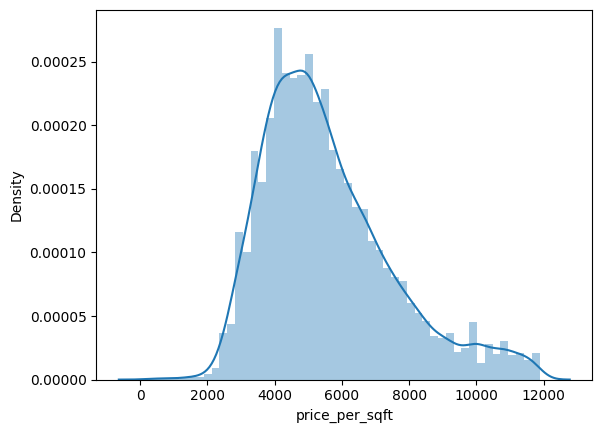

In [52]:
sns.distplot(new_df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

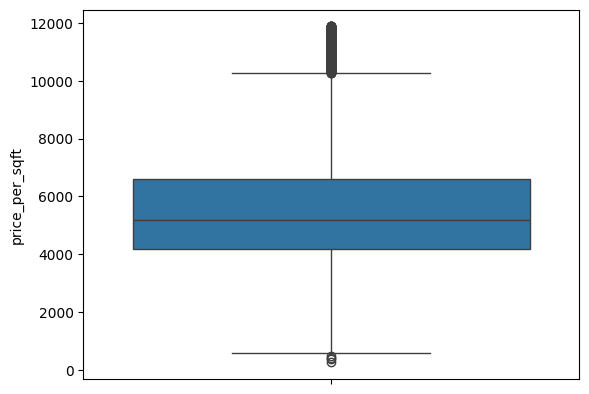

In [53]:
sns.boxplot(new_df['price_per_sqft'])

C:\Users\devik\AppData\Local\Temp\ipykernel_28364\2262067392.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

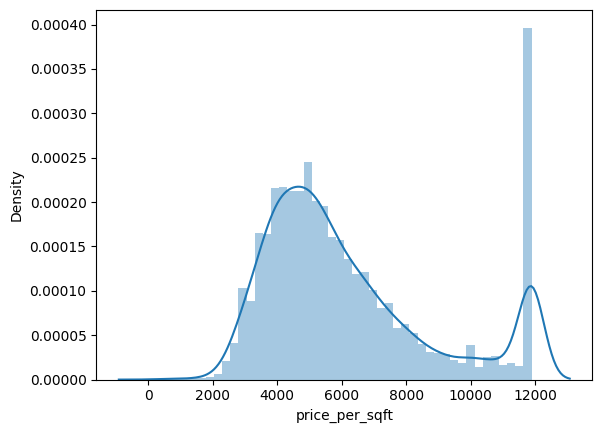

In [55]:
#capping
new_df = df.copy()
new_df.loc[new_df['price_per_sqft'] >= upper_limit,'price_per_sqft'] = upper_limit
new_df.loc[new_df['price_per_sqft'] <= lower_limit,'price_per_sqft'] = lower_limit
sns.distplot(new_df['price_per_sqft'])


<Axes: ylabel='price_per_sqft'>

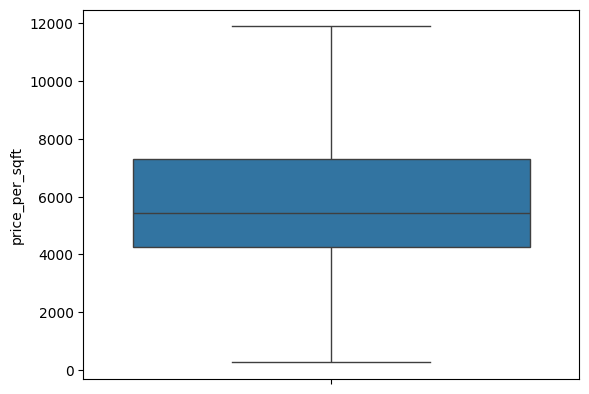

In [56]:
sns.boxplot(new_df['price_per_sqft'])

### z-score method

In [57]:
df = pd.read_csv('house_price.csv')

upper_limit = df['price_per_sqft'].mean() + 3 * df['price_per_sqft'].std() 
lower_limit = df['price_per_sqft'].mean() - 3 * df['price_per_sqft'].std() 
print (upper_limit,lower_limit)

328101.8177267502 -312261.14424190175


In [59]:
#trimming
new_df = df.loc[(df['price_per_sqft'] <= upper_limit) |(df['price_per_sqft'] >= lower_limit)]
print(new_df)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

C:\Users\devik\AppData\Local\Temp\ipykernel_28364\3428773528.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

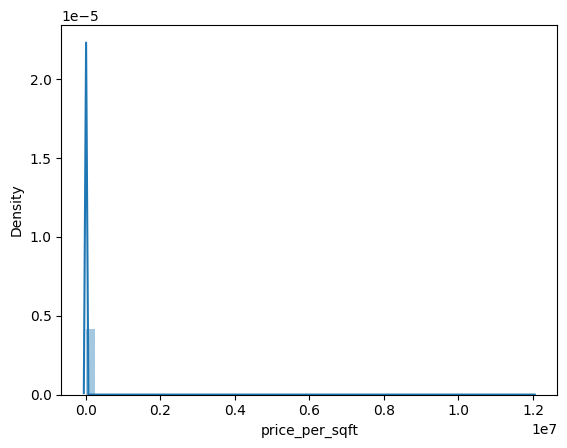

In [63]:
sns.distplot(new_df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

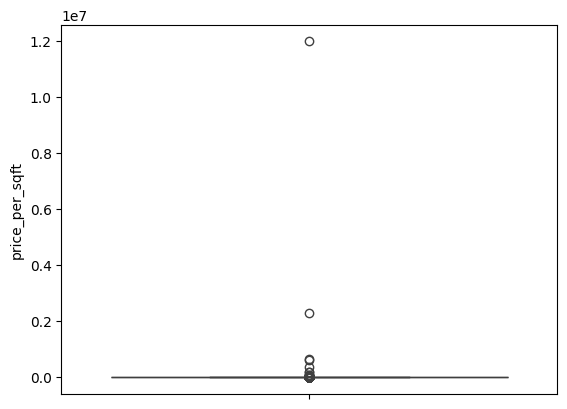

In [64]:
sns.boxplot(new_df['price_per_sqft'])

C:\Users\devik\AppData\Local\Temp\ipykernel_28364\2907330495.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '328101.8177267502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[new_df['price_per_sqft'] >= upper_limit,'price_per_sqft'] = upper_limit
C:\Users\devik\AppData\Local\Temp\ipykernel_28364\2907330495.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

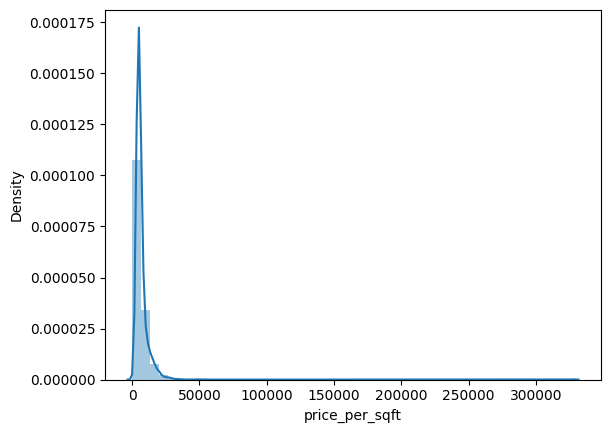

In [65]:
# capping 
new_df = df.copy()
new_df.loc[new_df['price_per_sqft'] >= upper_limit,'price_per_sqft'] = upper_limit
new_df.loc[new_df['price_per_sqft'] <= lower_limit,'price_per_sqft'] = lower_limit
sns.distplot(new_df['price_per_sqft'])


<Axes: ylabel='price_per_sqft'>

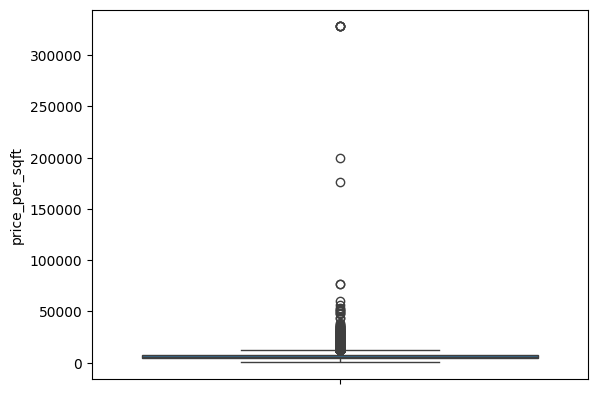

In [66]:
sns.boxplot(new_df['price_per_sqft'])

## Checking other values 

In [67]:
df= pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: ylabel='total_sqft'>

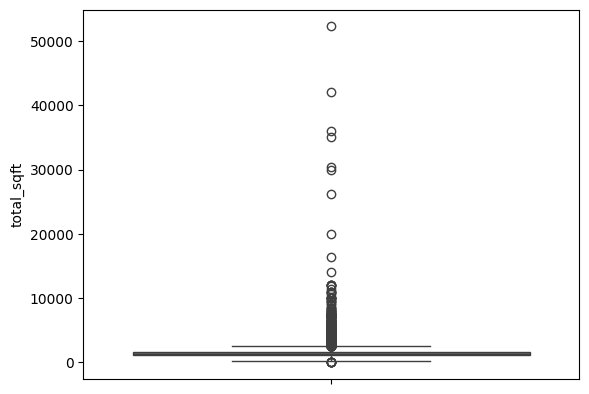

In [68]:
sns.boxplot(df['total_sqft'])

<Axes: ylabel='bath'>

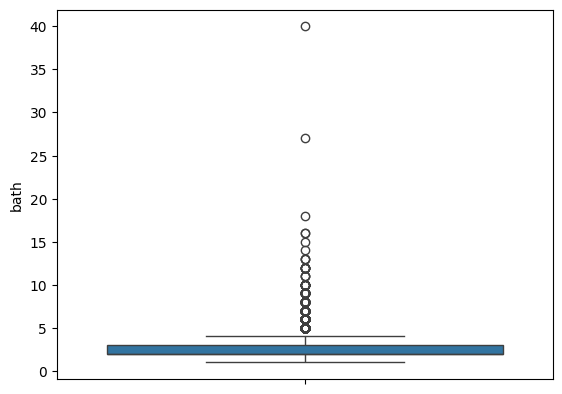

In [69]:
sns.boxplot(df['bath'])

<Axes: ylabel='price'>

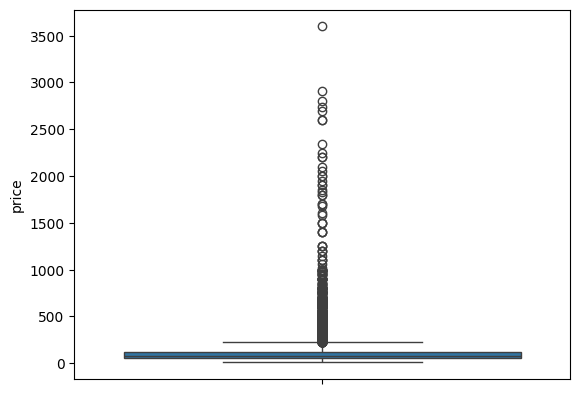

In [70]:
sns.boxplot(df['price'])

<Axes: ylabel='bhk'>

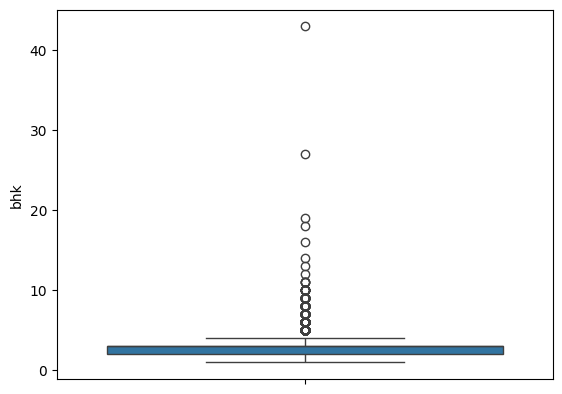

In [71]:
sns.boxplot(df['bhk'])

C:\Users\devik\AppData\Local\Temp\ipykernel_28364\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

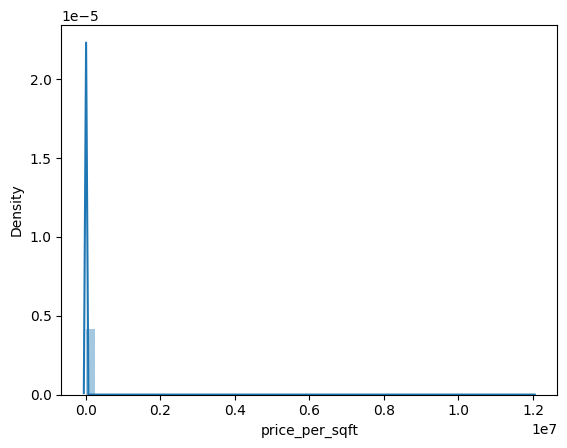

In [72]:
sns.distplot(df['price_per_sqft'])

In [87]:
new_df = df.drop(['location','size'],axis='columns')


In [88]:
print (new_df)

       total_sqft  bath   price  bhk  price_per_sqft
0          1056.0   2.0   39.07    2            3699
1          2600.0   5.0  120.00    4            4615
2          1440.0   2.0   62.00    3            4305
3          1521.0   3.0   95.00    3            6245
4          1200.0   2.0   51.00    2            4250
...           ...   ...     ...  ...             ...
13195      3453.0   4.0  231.00    5            6689
13196      3600.0   5.0  400.00    4           11111
13197      1141.0   2.0   60.00    2            5258
13198      4689.0   4.0  488.00    4           10407
13199       550.0   1.0   17.00    1            3090

[13200 rows x 5 columns]


In [89]:
new_df.corr()

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


<Axes: >

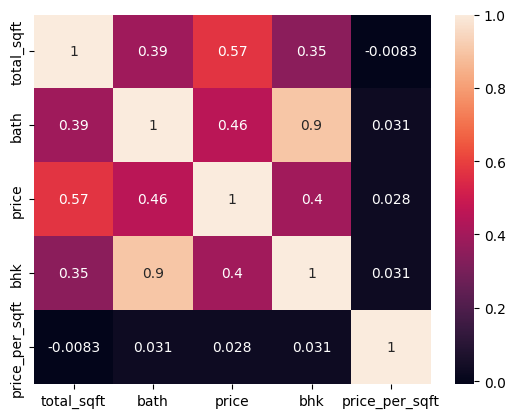

In [90]:
sns.heatmap(new_df.corr(),annot = True)